# 450.删除二叉搜索树中的节点
输入：二叉搜索树的根节点root，确定值key  
输出：删除二叉搜索树中值为key的节点后的二叉搜索树  
ps：删除后仍要保持二叉搜索树的性质  

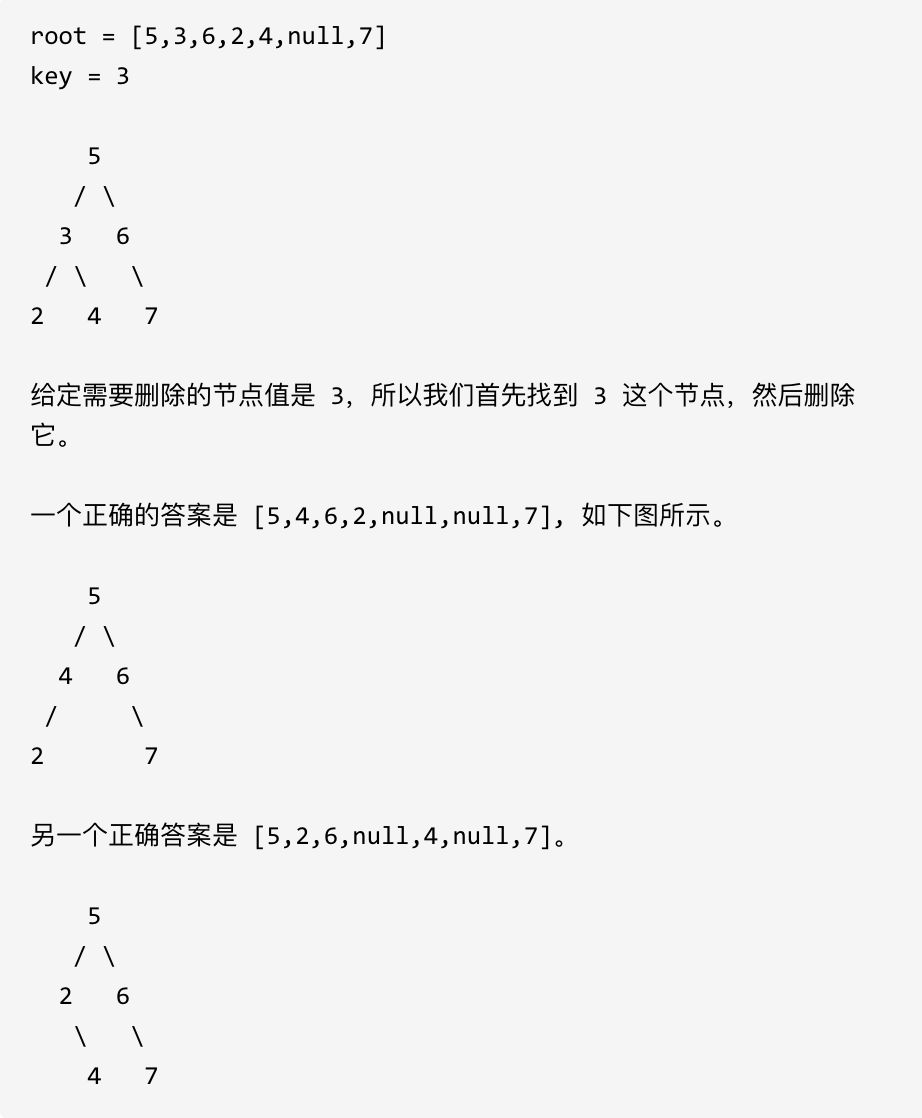

## 思路
二叉搜索树删除节点比增加节点复杂得多  
增加节点可以直接在叶子上增加，不用重构二叉树  

但是删除节点涉及到树结构的调整

### 递归三部曲
1. 参数和返回值
   - 参数：root， key
   - 返回值：通过返回值删除节点

2. 终止条件
   - 遍历遇到空返回  
   - 也就是没找到需要删除的节点

3. 单层递归逻辑
   所有可能的情况：  
   - 1）没找到需要删除的节点，遍历到空直接返回
   - 找到了需要删除的节点：  
     - 2）左右孩子都为空（叶子节点）：直接删除，返回null为根节点  
     - 3）左空右不空：删除节点，右孩子补位，返回右孩子作为根节点  
     - 4）右空左不空：删除节点，左孩子补位，返回左孩子为根节点  
     - 5）左右都不空：删除节点，其左孩子作为其右孩子最左面节点的左孩子。返回被删除节点的右孩子为根节点  


In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None) -> None:
        self.val = val
        self.left = left
        self.right = right

# 递归,有返回值
        
class Solution:
    def deleteNode(self, root, key):
        if root is None:
            return root
        
        if root.val == key:
            if root.left is None and root.right is None:
                return None
            elif root.left is None:
                return root.right
            elif root.right is None:
                return root.left
            else:
                cur = root.right
                while cur.left is not None:
                    cur = cur.left  # 找到被删除节点右孩子的最左面节点
                cur.left = root.left  # 被删除节点的左子树接到最左面节点的做孩子上
                return root.right  # 返回右孩子补位
        if root.val > key:
            root.left = self.deleteNode(root.left, key)
        if root.val < key:
            root.right = self.deleteNode(root.right, key)
        return root